In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sys import path
%matplotlib inline

In [ ]:
%cd /content/drive/MyDrive/PHI/ToF_ML/src

/content/drive/MyDrive/PHI/ToF_ML/src


In [ ]:
from ast import literal_eval
df = pd.read_csv('../data/full_corrected_data.csv')
df['channels']  = df['channels'].apply(literal_eval)
df['intensities'] = df['intensities'].apply(literal_eval)
df['masses'] = df['masses'].apply(literal_eval)

In [ ]:
df.dropna(inplace=True)
df = df[df['intensities'].apply(len)> 0].copy()
df.head()

,file_name,MassOverTime,MassOffset,StartFlightTime,SpecBinSize,channels,intensities,masses,adjusted_original_proportion_identified,avg_dist_frags_low,avg_dist_frags_high,adjusted_proportion_identified,proportion_identified,diff,prop_diff_in_low,calibration
0,0106301.cas,0.387384,-0.275004,0.0,1.248,"[2644.0367300000003, 3505.0183700000002, 4162....","[73874, 1234, 138, 610, 1216, 4159, 8958, 1084...","[1.0065519723918102, 2.015029094672708, 3.0191...",0.398438,0.001298,0.002255,0.515625,0.515625,0.000958,0.738174,0
1,0107316.cas,0.387113,-0.278302,0.0,1.248,"[2647.00072, 3508.9949100000003, 4164.59326000...","[49864, 1034, 168, 4696, 8247, 13992, 17903, 2...","[1.00101811517532, 2.0077555328930656, 3.00565...",0.129771,0.001537,0.002586,0.511450,0.511450,0.001049,0.682225,0
2,0110203.cas,0.379037,-0.271056,0.0,4.992,"[1973.87665, 2049.0706800000003, 2122.01224, 2...","[23352, 74717, 10387, 947, 12344, 9121, 249, 4...","[11.998071176139083, 13.003971096434277, 14.01...",0.388889,0.001640,0.001858,0.444444,0.444444,0.000218,0.133100,0
3,0110212.cas,0.379177,-0.269744,0.0,4.992,"[672.00298, 891.90543, 1970.94521, 2046.11295,...","[34398, 304, 2223, 3521, 5205, 6509, 99, 115, ...","[1.0045194511091773, 2.012140966655108, 11.978...",0.379630,0.001337,0.002206,0.592593,0.592593,0.000868,0.649178,0
4,0116511.cas,0.383360,-0.302184,0.0,1.248,"[2726.98153, 3594.53649, 4265.28736, 7866.5038...","[42995, 602, 151, 17912, 9536, 17609, 29604, 5...","[1.0049940659400325, 2.0094784706009245, 3.022...",0.350427,0.001397,0.002171,0.487179,0.467213,0.000774,0.554114,0


In [ ]:
mods_1400 = pd.read_csv('../data/fixing 1441 calibration/duplicate_indices_removed_calib_modifiers.csv')

In [ ]:
mods_1900 = pd.read_csv('../data/fixing 1910 calibration/mods_for_1910.csv')

In [ ]:
mods_1400.describe()

,Unnamed: 0,offsets,slopes,indices
count,1437.000000,1437.000000,1.437000e+03,1437.000000
mean,718.000000,-0.000031,2.122855e-05,720.182324
std,414.970481,0.000381,2.003673e-04,417.825193
min,0.000000,-0.004508,-1.505051e-03,0.000000
25%,359.000000,-0.000151,-1.549451e-07,359.000000
50%,718.000000,-0.000050,1.549451e-07,718.000000
75%,1077.000000,0.000092,3.645276e-05,1081.000000
max,1436.000000,0.010617,1.811688e-03,1448.000000


In [ ]:
mods_1900.describe()

,offsets,slopes,indices
count,1911.000000,1.911000e+03,1911.000000
mean,-0.000123,3.728741e-05,955.950288
std,0.001386,4.381757e-04,551.884383
min,-0.024345,-3.551525e-03,0.000000
25%,-0.000640,-5.272632e-05,478.500000
50%,-0.000091,7.252747e-08,956.000000
75%,0.000495,8.527342e-05,1433.500000
max,0.020740,1.231716e-02,1911.000000


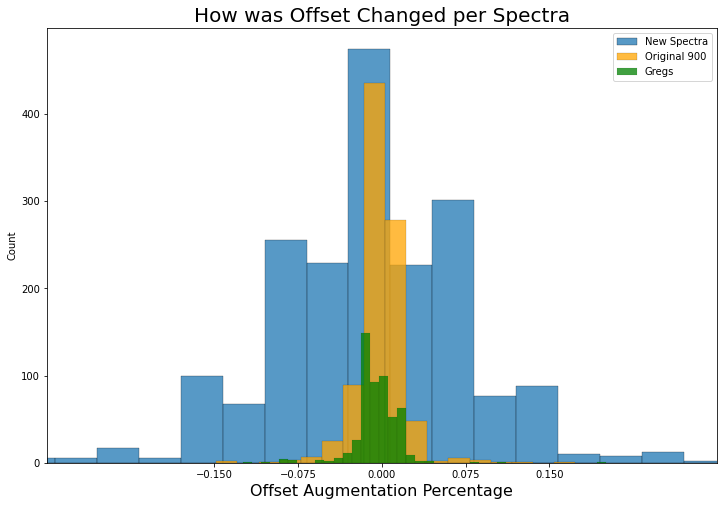

In [ ]:
fig, ax = plt.subplots()
sns.histplot(mods_1900['offsets'] * 100, ax=ax, label='New Spectra', bins=120)
sns.histplot(mods_1400.loc[0:906]['offsets'] * 100, ax=ax, color='Orange', label='Original 900', bins=80)
sns.histplot(mods_1400.loc[906:]['offsets'] * 100, ax=ax, color='green', label='Gregs', bins=40)
ax.set_xlim(-.3,.3)
ax.set_xticks(np.linspace(-.15,.15, 5))
ax.set_xlabel('Offset Augmentation Percentage', fontsize=16)
ax.set_title('How was Offset Changed per Spectra', fontsize=20)
fig.set_size_inches(12,8)
ax.legend()
plt.show()

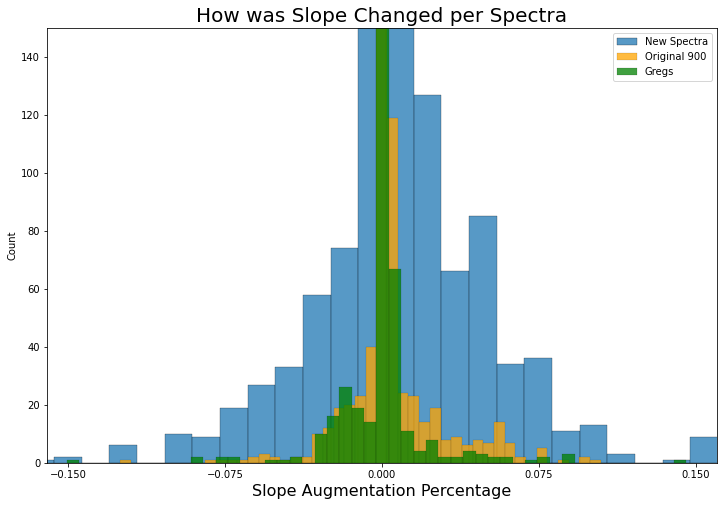

In [ ]:
fig, ax = plt.subplots()
sns.histplot(mods_1900['slopes'] * 100, ax=ax, label='New Spectra', bins=120)
sns.histplot(mods_1400.loc[0:906]['slopes'] * 100, ax=ax, color='Orange', label='Original 900', bins=60)
sns.histplot(mods_1400.loc[906:]['slopes'] * 100, ax=ax, color='green', label='Gregs', bins=50)


ax.set_xlim(-.16,.16)
ax.set_ylim(0, 150)
ax.set_xticks(np.linspace(-.15,.15, 5))
ax.set_xlabel('Slope Augmentation Percentage', fontsize=16)
ax.set_title('How was Slope Changed per Spectra', fontsize=20)
fig.set_size_inches(12,8)
ax.legend()
plt.show()

In [ ]:
df['improvement'] = df['adjusted_proportion_identified'] - df['adjusted_original_proportion_identified']

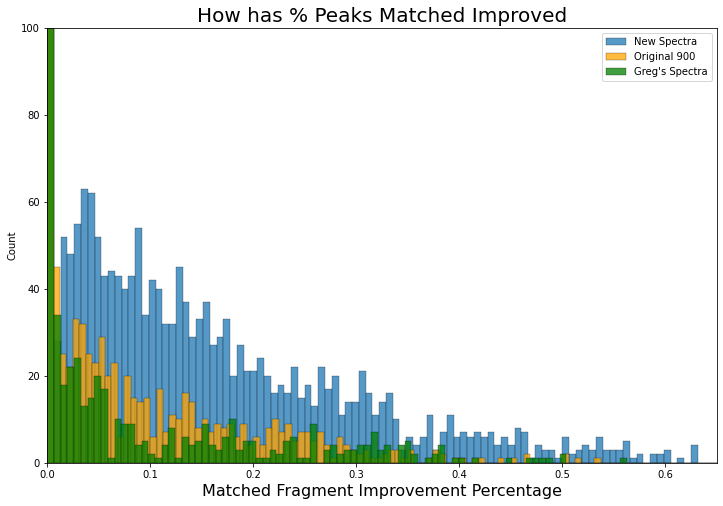

In [ ]:
fig, ax = plt.subplots()
sns.histplot(df.loc[1437:]['improvement'], ax=ax, label='New Spectra', bins=120)
sns.histplot(df.loc[0:906]['improvement'], ax=ax, label='Original 900', bins=120, color='orange')
sns.histplot(df.loc[906:1437]['improvement'], ax=ax, label="Greg's Spectra", bins=120, color='green')

ax.set_xlim(0,.65)
ax.set_ylim(0, 100)
ax.set_xlabel('Matched Fragment Improvement Percentage', fontsize=16)
ax.set_title('How has % Peaks Matched Improved', fontsize=20)
fig.set_size_inches(12,8)
ax.legend()
plt.show()

In [ ]:
def convert_slope(row):
    val = 1 / (row.SpecBinSize * .001 * row[2])
    return val
def convert_intercept(slope, row):
    return (-1 * slope * row.MassOffset - (row.StartFlightTime / (row.SpecBinSize * 0.001)) )

In [ ]:
for row in c.itertuples():
    slope = convert_slope(row)
    print(slope)
    print((convert_intercept(slope, row)))

In [2]:
%cd /content/drive/MyDrive/PHI/ToF_ML

/content/drive/MyDrive/PHI/ToF_ML


In [3]:
%pycat .gitignore

In [4]:
%%writefile .gitignore
/__pycache__
/.ipynb_checkpoints
/data
/notebooks/.ipynb_checkpoints
/src/__pycache__
.DS_Store
.vscode
/venv/
/models/
best_model.hdf5
datalast_model.hdf5
df_best_model.csv
df_metrics.csv
epochs_loss.png
history.csv
last_model.hdf5
model_init.hdf5
models/
notebooks/Slope Error Only Collab.ipynb
notebooks/SpectraCalibration.ipynb
notebooks/Untitled0.ipynb
src/low_error_model.keras
test_duration.csv
y_pred.npy

Overwriting .gitignore
